# Housing Price Prediction — EDA & Visualization

**Project:** Housing Price Prediction Dashboard  

**Notebook:** Exploratory Data Analysis (EDA) & Visualization

---

## Overview
This notebook performs exploratory data analysis (EDA) on the Housing Price dataset.  
The goal is to understand data distributions, detect anomalies, visualize relationships, and extract insights to guide model building and dashboard design.

---

## Sections

1. **Data Overview**  
   - Load and inspect the processed dataset  
   - Check data types, shapes, and basic statistics  

2. **Data Cleaning & Validation**  
   - Verify missing values  
   - Detect duplicates or inconsistent entries  

3. **Univariate Analysis**  
   - Examine distributions of individual features  
   - Visualize numeric and categorical variables  

4. **Bivariate Analysis**  
   - Explore relationships between features and target (`resale_price`)  
   - Scatterplots, boxplots, and trend analyses  

5. **Correlation & Feature Relationships**  
   - Compute correlation matrices  
   - Identify highly correlated features and potential multicollinearity  

6. **Insights & Summary**  
   - Key observations from visualizations  
   - Implications for model training and dashboard design  

---


## 1) Data Overview

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
sns.set(style="whitegrid")

In [2]:
data_path = "data/cleaned_resale_flat_price.csv"
df = pd.read_csv(data_path)

# Display dataset shape
print(f"Dataset shape: {df.shape}")

# Display first few rows
df.head()

Dataset shape: (218304, 13)


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,remaining_lease_years,resale_price,storey_range,street_name,town,year
0,406,Improved,2 Room,44.0,1979,Jan,61 years 04 months,61.333333,232000.0,10 To 12,Ang Mo Kio Ave 10,Ang Mo Kio,2017
1,108,New Generation,3 Room,67.0,1978,Jan,60 years 07 months,60.583333,250000.0,01 To 03,Ang Mo Kio Ave 4,Ang Mo Kio,2017
2,602,New Generation,3 Room,67.0,1980,Jan,62 years 05 months,62.416667,262000.0,01 To 03,Ang Mo Kio Ave 5,Ang Mo Kio,2017
3,465,New Generation,3 Room,68.0,1980,Jan,62 years 01 month,62.083333,265000.0,04 To 06,Ang Mo Kio Ave 10,Ang Mo Kio,2017
4,601,New Generation,3 Room,67.0,1980,Jan,62 years 05 months,62.416667,265000.0,01 To 03,Ang Mo Kio Ave 5,Ang Mo Kio,2017


In [3]:
# Quick summary of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218304 entries, 0 to 218303
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   block                  218304 non-null  object 
 1   flat_model             218304 non-null  object 
 2   flat_type              218304 non-null  object 
 3   floor_area_sqm         218304 non-null  float64
 4   lease_commence_date    218304 non-null  int64  
 5   month                  218304 non-null  object 
 6   remaining_lease        218304 non-null  object 
 7   remaining_lease_years  218304 non-null  float64
 8   resale_price           218304 non-null  float64
 9   storey_range           218304 non-null  object 
 10  street_name            218304 non-null  object 
 11  town                   218304 non-null  object 
 12  year                   218304 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 21.7+ MB


In [4]:
# Summary statistics for numeric columns
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease_years,resale_price,year
count,218304.000000,218304.000000,218304.000000,2.183040e+05,218304.000000
mean,96.802442,1996.407317,74.286897,5.224618e+05,2021.157817
std,24.027444,14.283068,14.208819,1.854624e+05,2.488445
min,31.000000,1966.000000,40.083333,1.400000e+05,2017.000000
25%,81.000000,1985.000000,62.500000,3.850000e+05,2019.000000
50%,93.000000,1997.000000,74.083333,4.900000e+05,2021.000000
75%,112.000000,2012.000000,88.666667,6.280000e+05,2023.000000
max,366.700000,2022.000000,97.750000,1.658888e+06,2025.000000


In [5]:
# Summary for categorical columns
df.select_dtypes(include='object').describe()

,block,flat_model,flat_type,month,remaining_lease,storey_range,street_name,town
count,218304,218304,218304,218304,218304,218304,218304,218304
unique,2743,21,7,12,693,17,576,26
top,2,Model A,4 Room,Jul,94 years 10 months,04 To 06,Yishun Ring Rd,Sengkang
freq,655,77874,92432,21527,1908,50082,3126,17869


## 2) Data Cleaning and Validation

In [6]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) == 0:
    print("No missing values found.")
else:
    print("Columns with missing values:\n", missing)

No missing values found.


In [7]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

df = df.drop_duplicates()
print("Duplicates removed. New dataset shape:", df.shape)

Number of duplicate rows: 0
Duplicates removed. New dataset shape: (218304, 13)


In [8]:
# Display data types
df.dtypes

block                     object
flat_model                object
flat_type                 object
floor_area_sqm           float64
lease_commence_date        int64
month                     object
remaining_lease           object
remaining_lease_years    float64
resale_price             float64
storey_range              object
street_name               object
town                      object
year                       int64
dtype: object

## 3) Univariate Analysis

### Numeric Features

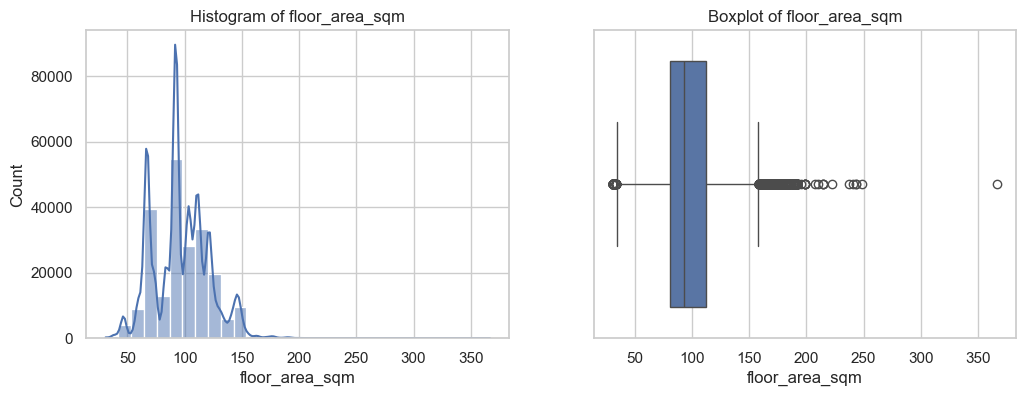

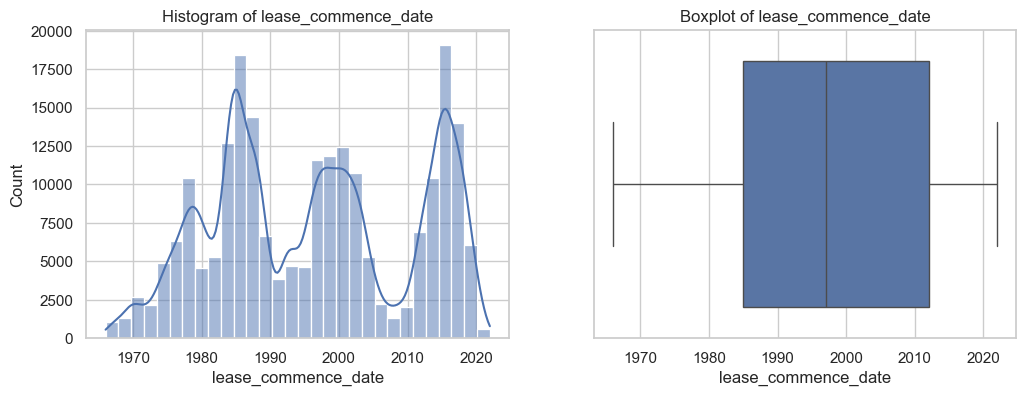

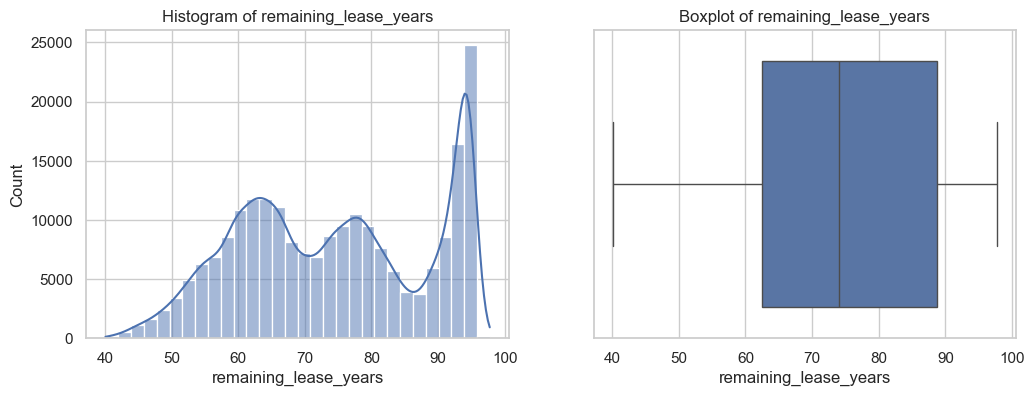

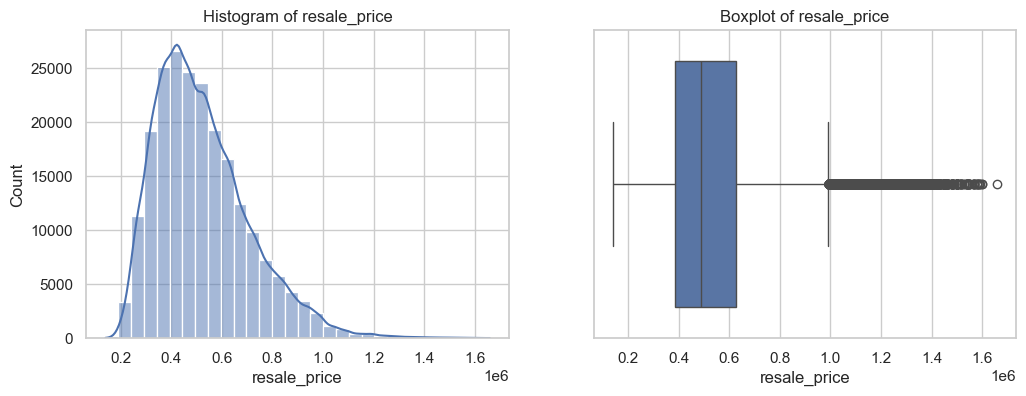

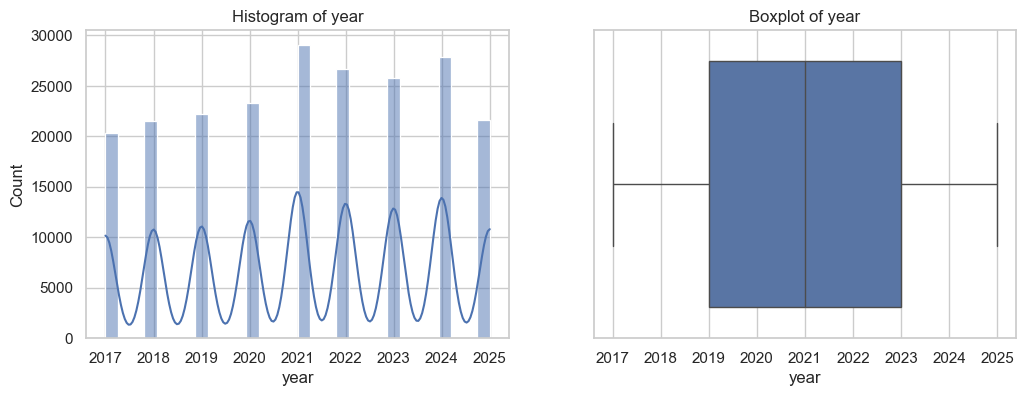

In [9]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
if 'month_num' in numeric_cols:
    numeric_cols.remove('month_num')

# Seaborn histograms and boxplots
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

### Key Insights from Univariate Analysis

1. **Lease Commencement Trends:**  
   The dataset shows clear peaks in lease commencement years around **1985, 2000, and 2015**, suggesting a roughly **15-year cyclical pattern**. If this trend continues, the next expected peak in lease commencement could occur around **2030**. This is also reflected in the three corresponding peaks observed in the distribution of remaining lease years.

2. **Floor Area:**  
   Most flats have a floor area of approximately **100 sqm**, although there are notable outliers with significantly larger areas, indicating some variability in flat sizes.

3. **Resale Price Distribution:**  
   Resale prices exhibit a **slight right skew**, meaning there are some high-value outliers, and there are **many extreme values** compared to the majority of transactions, which cluster around the lower to mid-price range.


### Categorical Features

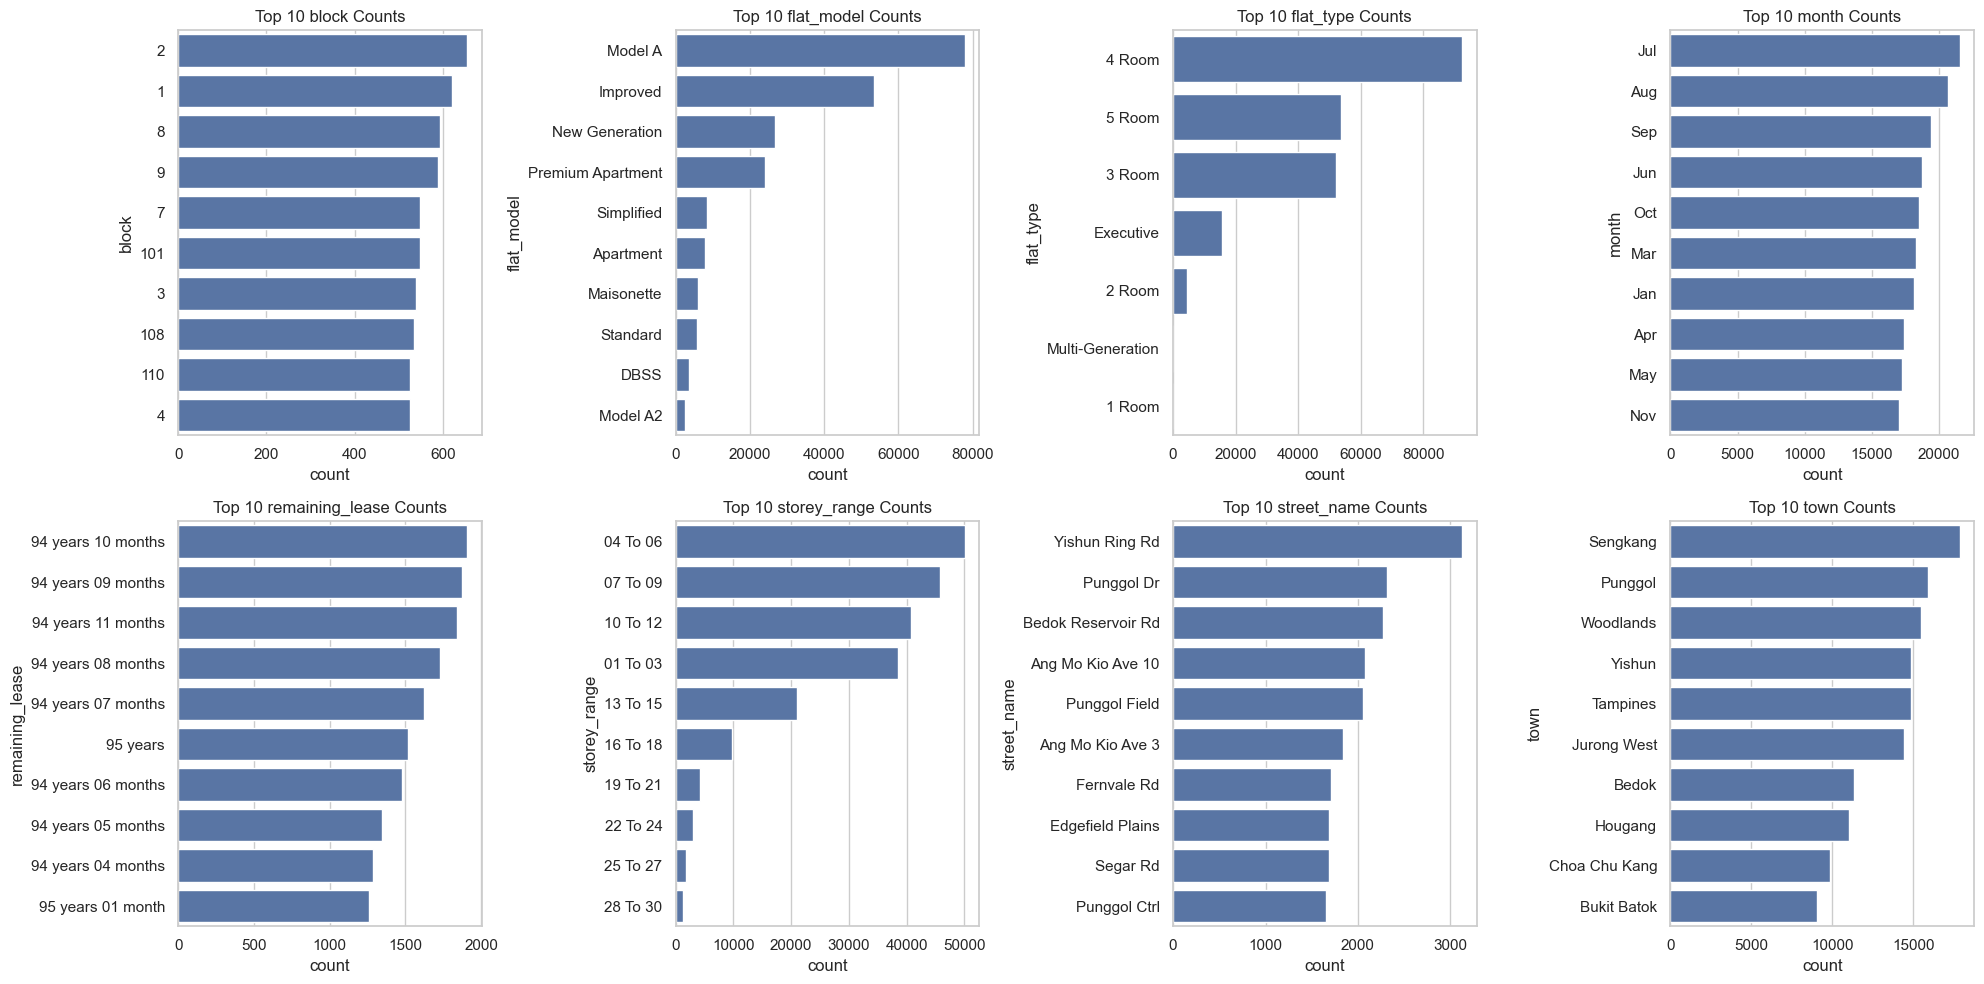

In [10]:
categorical_cols = df.select_dtypes(include='category').columns.tolist()
if not categorical_cols:  # fallback if you didn't convert to 'category'
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Seaborn countplots
top_n = 10
n_cols = 4  
n_rows = 2  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()  # flatten axes array for easy iteration

for i, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().nlargest(top_n).index
    sns.countplot(
        y=col, 
        data=df[df[col].isin(top_categories)], 
        order=top_categories, 
        ax=axes[i]
    )
    axes[i].set_title(f'Top {top_n} {col} Counts')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



### Key Insights from Categorical Features

1. **Top Towns:**  
   The most frequent towns in the dataset include **Sengkang, Punggol, Woodlands, and Yishun**. Interestingly, these towns are located **closer to Singapore’s borders**, suggesting that a significant number of flats are situated **farther from city centers**.

2. **Remaining Lease:**  
   Most flats have a **remaining lease exceeding 90 years**, indicating relatively long-term leases still available in the market.

3. **Flat Types and Models:**  
   The **4-room flats** are the most common flat type, and **Model A** is the most frequently occurring flat model.

4. **Purchase Month Trends:**  
   While the variation in purchases across months is not very large, there is a noticeable **increase in purchases during the second half of the year** compared to the first half.


## 4) Bivariate Analysis

### Numeric Values vs Resale Price

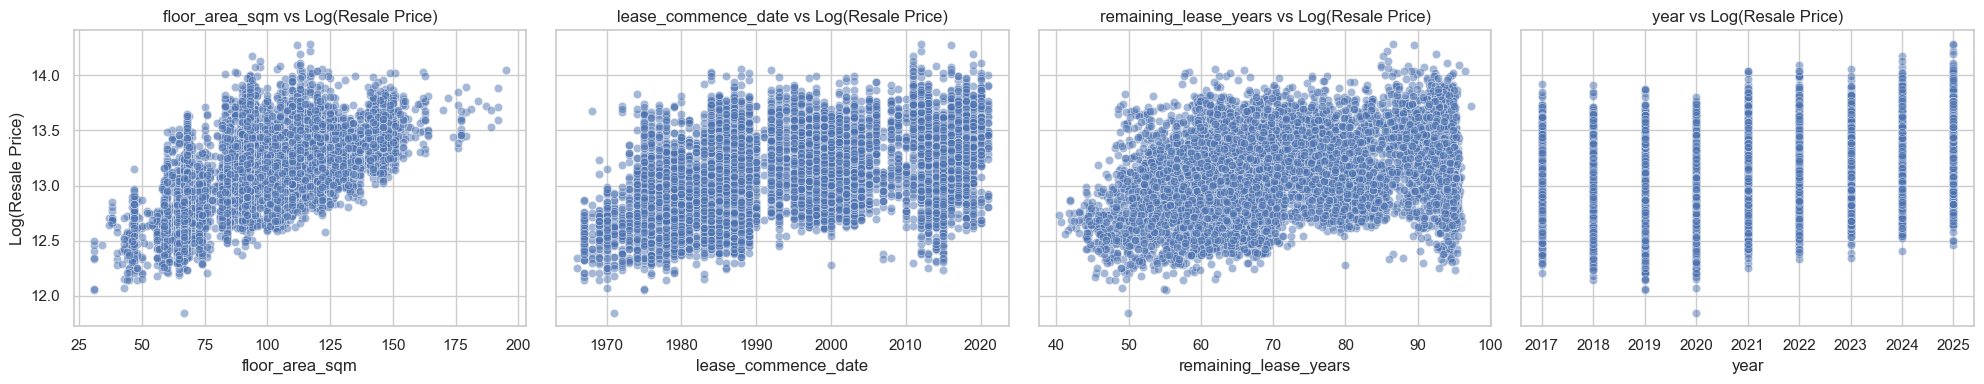

In [11]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('resale_price')  # exclude target

sample_df = df.sample(n=10000, random_state=42)

n_cols = len(numeric_cols)
fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 4), sharey=True)  

for i, col in enumerate(numeric_cols):
    sns.scatterplot(
        x=col, 
        y=np.log1p(sample_df['resale_price']),
        data=sample_df,
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'{col} vs Log(Resale Price)')
    axes[i].set_xlabel(col)
    if i == 0:
        axes[i].set_ylabel('Log(Resale Price)')
    else:
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


### Key Insights from Numerical Bivariate Analysis 

1. **Strongest Correlation:**  
   The feature showing the strongest relationship with **resale price** is **floor area (sqm)**, exhibiting a clear **positive correlation** — larger flats tend to sell for higher prices.

2. **Lease-Related Features:**  
   Both **remaining lease years** and **lease commencement date** show a **slight positive correlation** with resale price. This suggests that older flats with shorter remaining leases generally have lower resale prices, while newer flats with longer leases tend to be more expensive.


### Categorical Variables vs Resale Price

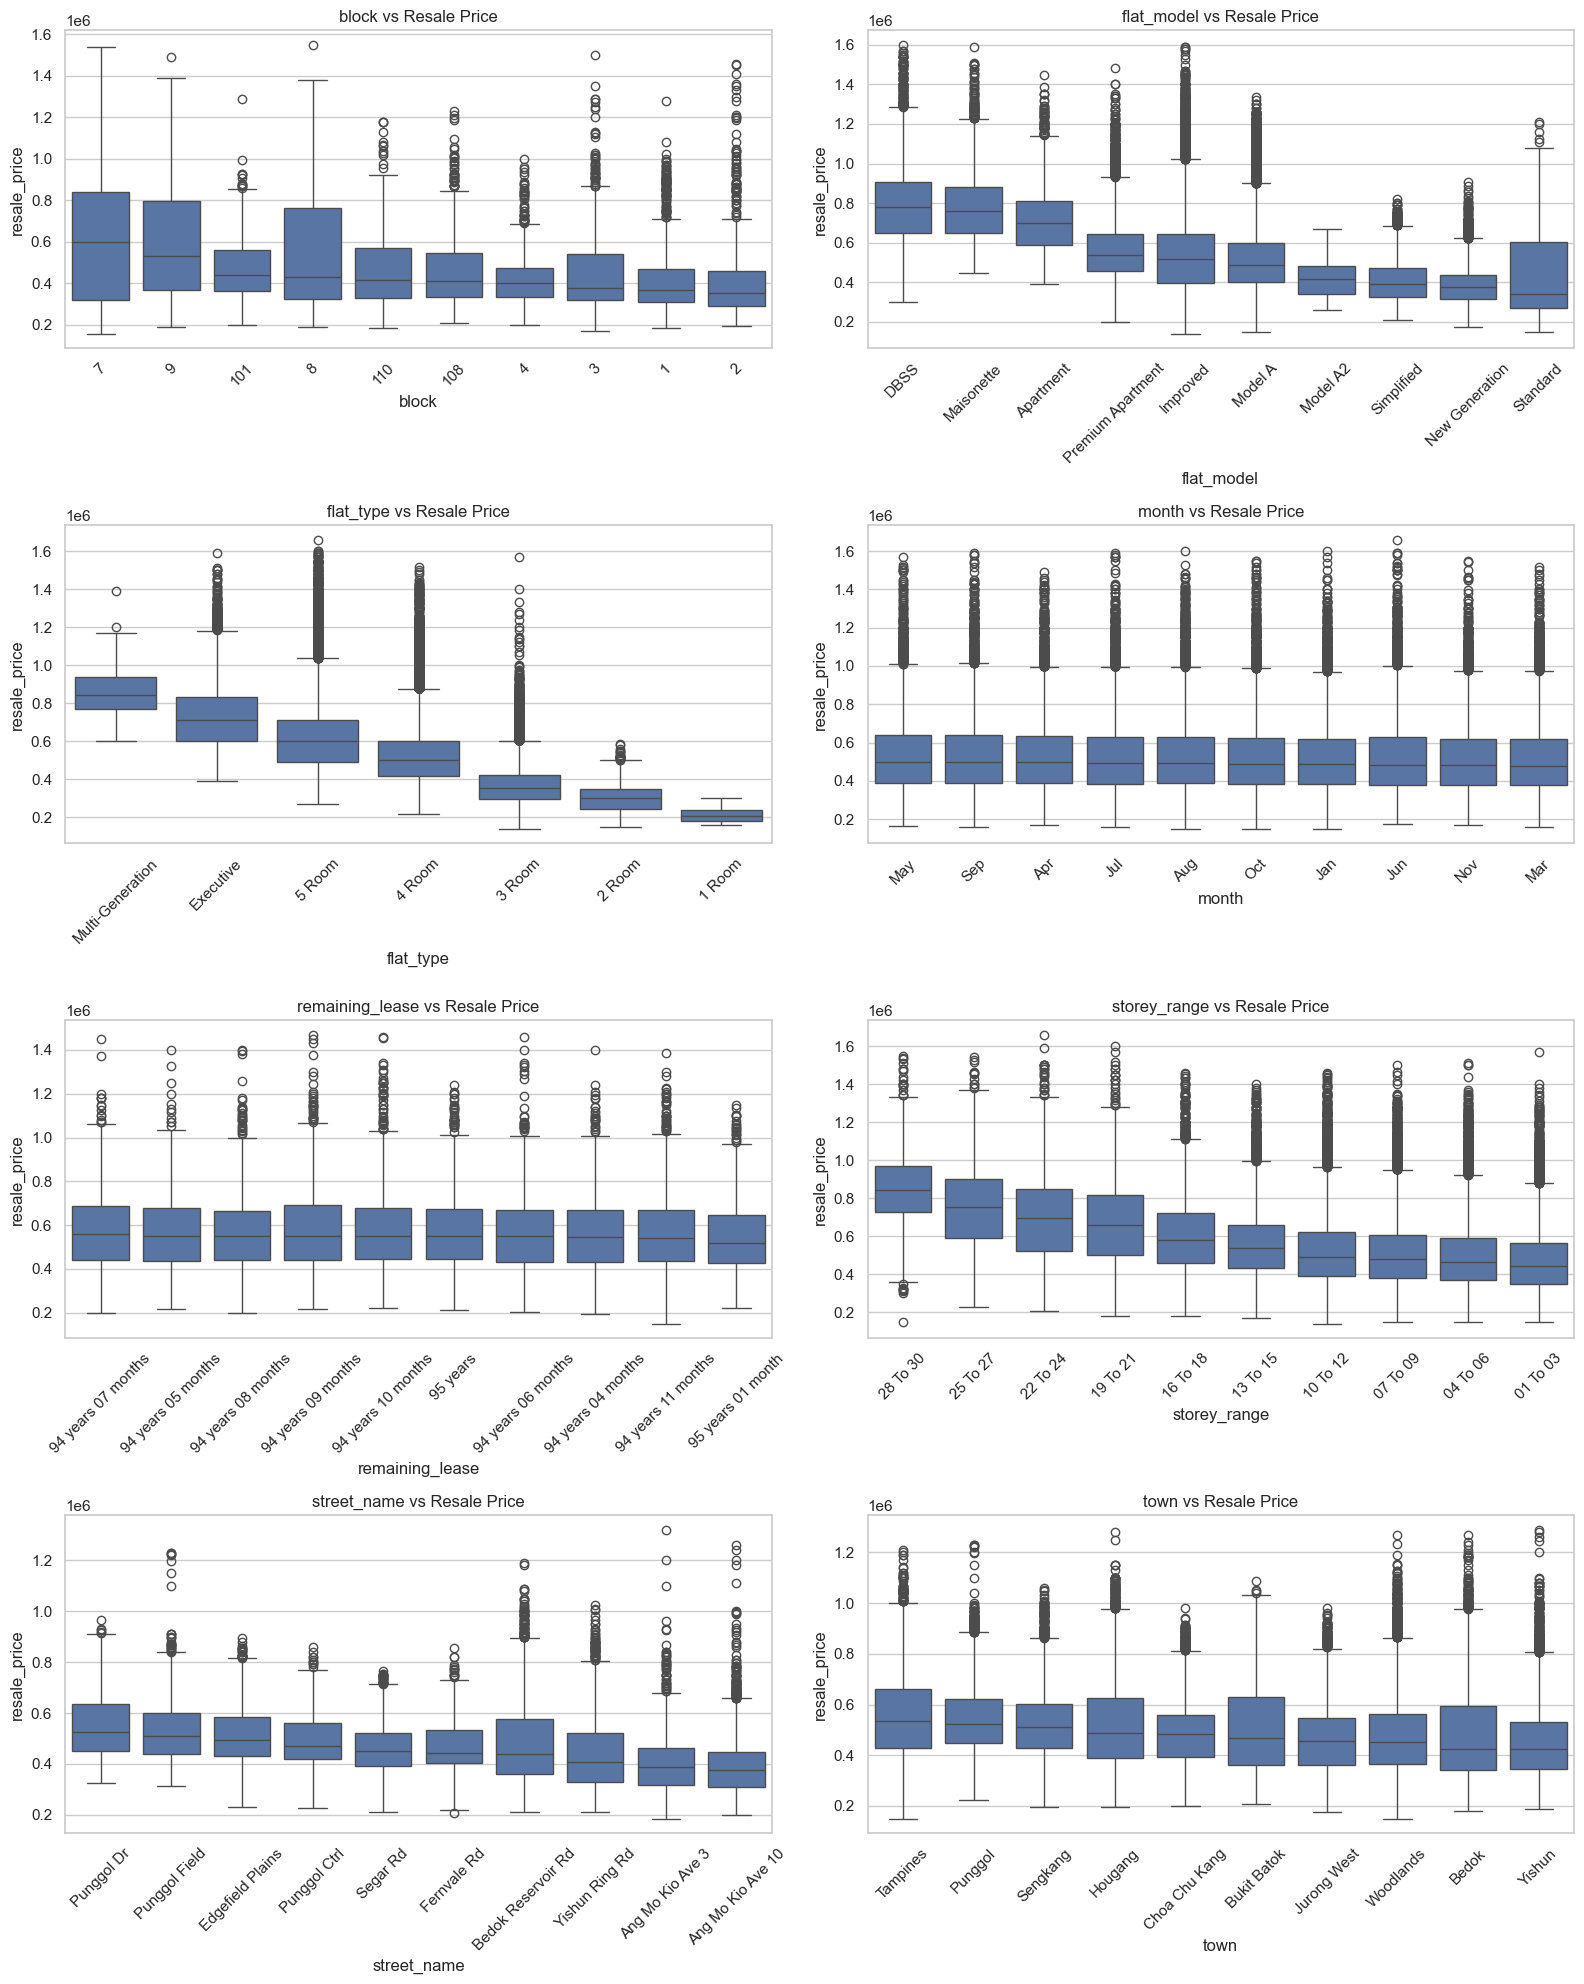

In [12]:
categorical_cols = df.select_dtypes(include='category').columns.tolist()
if not categorical_cols:
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

top_n = 10
n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))  # 4 rows x 2 cols
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i >= n_rows * n_cols:
        break  # avoid exceeding grid

    # Top categories by count
    top_categories = df[col].value_counts().nlargest(top_n).index
    subset = df[df[col].isin(top_categories)].copy()
    
    # Order categories by median resale_price descending
    medians = subset.groupby(col)['resale_price'].median().sort_values(ascending=False).index
    sns.boxplot(x=col, y='resale_price', data=subset, order=medians, ax=axes[i])
    axes[i].set_title(f'{col} vs Resale Price')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key Insights from Categorical Bivariate Analysis

1. **Most Influential Features:**  
   The features with the strongest influence on **resale price** are **flat type**, **flat model**, and **storey of the unit**. These characteristics clearly differentiate price levels across properties.

2. **Moderately Influential:**  
   **Town** appears to have a smaller, yet noticeable, effect on resale price, likely reflecting location-based demand.

3. **Minimal Influence:**  
   Other features, such as **month of purchase**, have practically no observable effect on resale price.


## 5) Correlation & Feature Relationships



### Correlation between numerical columns and the response - resale price

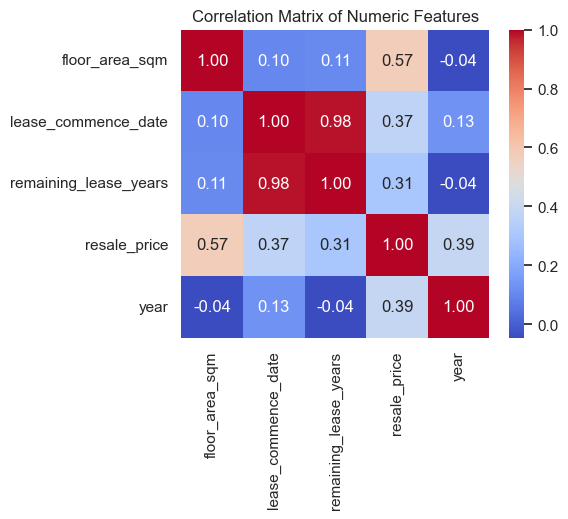

In [13]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

From the correlation matrix, it is evident that **floor area (sqm)** exhibits the strongest positive correlation with **resale price**, indicating that larger flats generally command higher prices.  

Additionally, **lease commence date** and **remaining lease years** are highly correlated, showing multicollinearity. Including either one of these features in a predictive model is sufficient.


### Computing ETA ratio between categorical variables and response

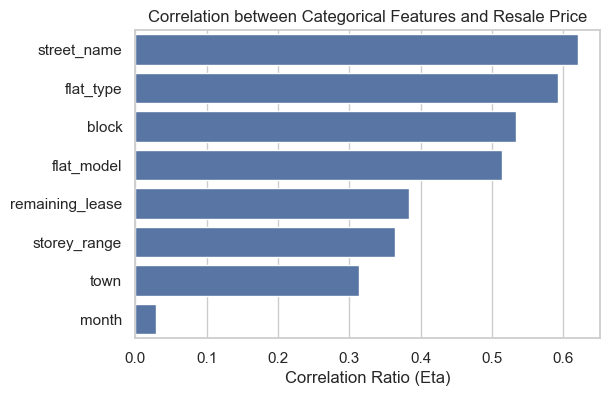

In [14]:
def correlation_ratio(categories, measurements):
    """
    Calculates correlation ratio (eta) between categorical and numeric variable.
    """
    categories = pd.Categorical(categories)
    measurements = np.array(measurements)
    
    # overall mean
    grand_mean = measurements.mean()
    
    # sum of squares between groups
    ss_between = sum(
        len(measurements[categories == cat]) * (measurements[categories == cat].mean() - grand_mean) ** 2
        for cat in categories.categories
    )
    
    # total sum of squares
    ss_total = sum((measurements - grand_mean) ** 2)
    
    eta = np.sqrt(ss_between / ss_total) if ss_total != 0 else 0
    return eta

# Select categorical columns
categorical_cols = df.select_dtypes(include='category').columns.tolist()
if not categorical_cols:
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Compute correlation ratio with resale_price
cat_corr = {col: correlation_ratio(df[col], df['resale_price']) for col in categorical_cols}
cat_corr = pd.Series(cat_corr).sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=cat_corr.values, y=cat_corr.index)
plt.xlabel("Correlation Ratio (Eta)")
plt.ylabel("")
plt.title("Correlation between Categorical Features and Resale Price")
plt.show()

### Investigating multicollinearity among the categorical variables

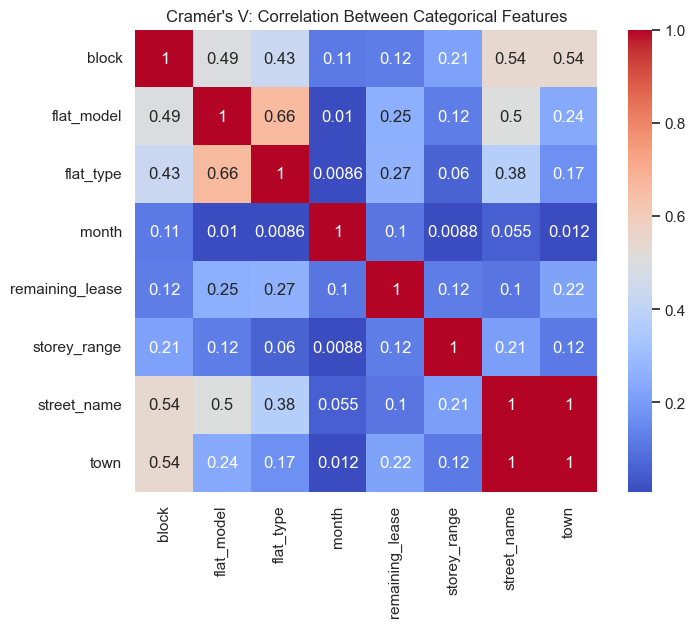

In [15]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Select categorical columns
categorical_cols = df.select_dtypes(include='category').columns.tolist()
if not categorical_cols:
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Compute Cramér's V matrix
cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix = cramers_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Cramér's V: Correlation Between Categorical Features")
plt.show()

Based on the categorical correlation analysis:

- **Street name** and **town** are perfectly associated (**Cramér’s V = 1**),  
- **Block** is moderately associated with both **town** and **street name** (**Cramér’s V ≈ 0.54**),  
- **Flat model** and **flat type** are strongly associated (**Cramér’s V = 0.66**).  

Considering multicollinearity and the correlation with **resale price** (eta), the primary categorical factors influencing price are **location** (town/street/block) and **flat type/model**.


## 6) Insights & Summary

Combining the univariate, bivariate, and correlation analyses, we observe that the primary factors affecting **resale price** are:

- **Floor area (sqm)** – larger flats generally command higher prices  
- **Flat type and flat model** – certain layouts and designs are more valuable  
- **Location** – town, street, and block significantly influence price  
- **Year of purchase** – newer flats tend to have higher resale values  

Other factors, such as storey range or month of purchase, have a minor or even no impact in comparison.
